In [2]:
# building neo sentiment

In [3]:
# 1. 导入工具包
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, TextClassificationPipeline
import torch

# 加载模型和tokenizer
tokenizer = BertTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = BertForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")

# 创建 pipeline，输出所有标签概率（正向/负向）
classifier = TextClassificationPipeline(model=model, tokenizer=tokenizer, return_all_scores=True, device=0 if torch.cuda.is_available() else -1)


tokenizer_config.json:   0%|          | 0.00/295 [00:00<?, ?B/s]

c:\Users\顾子琪\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\顾子琪\.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/409M [00:00<?, ?B/s]

Device set to use cpu
c:\Users\顾子琪\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [13]:
import pandas as pd

# 路径替换成你的实际路径
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 抽样查看 3 条不同分数的评论
sample_df = df[df['score'].isin([1,2,3])].sample(n=10, random_state=42)
print(sample_df[['score', 'content']])



     score                                            content
121    3.0                                           剧情为热血让步了
148    1.0                                             ？究竟。。。
377    3.0                                             还行就那样吧
984    3.0                         因为同学口中老能出线，娃被洗脑也去看了，中规中矩吧。
676    3.0  跟风看的，角色设计太幼态了，迪味拉满了??，全年龄动画也不用这么幼态吧，关键是一些活了几百岁...
955    3.0                                        工业味太浓，堆料堆得多
502    3.0                                            没达预期，一般
912    3.0                        故事没有深度，特效好看但到处都是抄袭痕迹！原创性不足！
178    3.0                                        还行，我觉得剧情有点差
518    1.0                                     一般 完全搞不懂高票房在哪里


In [14]:
from transformers import pipeline

# 构建情感分类器（输出所有标签概率）
classifier = pipeline(
    "text-classification",
    model="uer/roberta-base-finetuned-dianping-chinese",
    tokenizer="uer/roberta-base-finetuned-dianping-chinese",
    top_k=None
)

print("✅ 模型加载成功")


Device set to use cpu


✅ 模型加载成功


In [15]:
# 测试用例
test_text = sample_df['content'].iloc[0]
print("测试文本：", test_text)

# 模型推理
result = classifier(test_text)

# 输出结构和数据类型
print("\n📦 模型原始输出：", result)
print("📚 类型：", type(result))
print("🧩 单个元素结构：", result[0], "| 类型：", type(result[0]))


测试文本： 剧情为热血让步了

📦 模型原始输出： [[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9623503684997559}, {'label': 'positive (stars 4 and 5)', 'score': 0.03764962777495384}]]
📚 类型： <class 'list'>
🧩 单个元素结构： [{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9623503684997559}, {'label': 'positive (stars 4 and 5)', 'score': 0.03764962777495384}] | 类型： <class 'list'>


In [16]:
# 函数：提取“positive”概率（保留 4 位小数）
def get_positive_score(output):
    for label_score in output[0]:
        if "positive" in label_score['label'].lower():
            return round(label_score['score'], 4)
    return 0.0  # fallback

# 测试打印
positive_prob = get_positive_score(result)
print(f"\n💡 提取的 positive 概率：{positive_prob}")



💡 提取的 positive 概率：0.0376


In [22]:
import pandas as pd
from transformers import pipeline

# 初始化情绪分析管道
classifier = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

# 读取一部分评论数据
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 选择一些样本进行测试，假设选择前五个评论
sample_comments = df['content'].head(5).tolist()

# 测试每个评论的情绪分析
for comment in sample_comments:
    print(f"\n原评论：{comment}")
    
    # 获取模型的输出
    result = classifier(comment)
    print(f"📦 模型原始输出：{result}")
    
    # 判断情绪标签，并根据标签输出情绪分数
    if result[0]["label"] == "positive (stars 4 and 5)":
        print(f"sentiment: {result[0]['score']}")
    else:
        print(f"sentiment: {1 - result[0]['score']}")




Device set to use cpu



原评论：二刷！依旧精彩
📦 模型原始输出：[{'label': 'positive (stars 4 and 5)', 'score': 0.9203067421913147}]
sentiment: 0.9203067421913147

原评论：支持一下国产动漫
📦 模型原始输出：[{'label': 'positive (stars 4 and 5)', 'score': 0.5134225487709045}]
sentiment: 0.5134225487709045

原评论：剧情搞笑又紧张
📦 模型原始输出：[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.6810948252677917}]
sentiment: 0.31890517473220825

原评论：还行吧，特效不错
📦 模型原始输出：[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.7928099632263184}]
sentiment: 0.20719003677368164

原评论：值得看的一部
📦 模型原始输出：[{'label': 'positive (stars 4 and 5)', 'score': 0.8354021310806274}]
sentiment: 0.8354021310806274


In [23]:
import pandas as pd
from transformers import pipeline

# 初始化情绪分析管道
classifier = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese")

# 读取数据
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 批量情绪分析函数
def analyze_sentiment(df):
    sentiment_list = []
    
    # 对每个评论进行情绪分析
    for comment in df['content']:
        # 获取模型的输出
        result = classifier(comment)
        
        # 判断情绪标签并获取分数
        if result[0]["label"] == "positive (stars 4 and 5)":
            sentiment_score = result[0]['score']
        else:
            sentiment_score = 1 - result[0]['score']
        
        sentiment_list.append(sentiment_score)
    
    # 覆写原本的 sentiment 列
    df['sentiment'] = sentiment_list
    return df

# 调用批量处理函数
df = analyze_sentiment(df)

# 保存新的 CSV 文件，带有更新的 sentiment 列
df.to_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_neo_building_clouds.csv', encoding='utf-8-sig', index=False)

print("情绪分析完成并保存至新的文件：Nezha2_neo_building_clouds.csv")


Device set to use cpu


情绪分析完成并保存至新的文件：Nezha2_neo_building_clouds.csv


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\顾子琪\AppData\Local\Temp\jieba.cache
Loading model cost 0.463 seconds.
Prefix dict has been built successfully.


[处理] gender 0，情绪区间：0.0 ~ 0.2，评论数：59


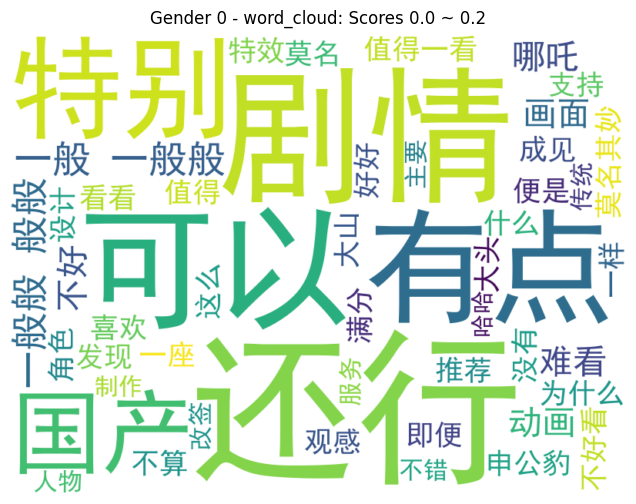

[处理] gender 0，情绪区间：0.2 ~ 0.4，评论数：33


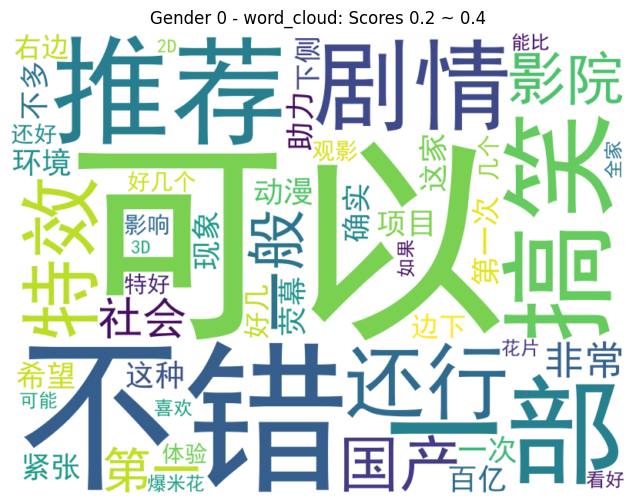

[处理] gender 0，情绪区间：0.4 ~ 0.6，评论数：37


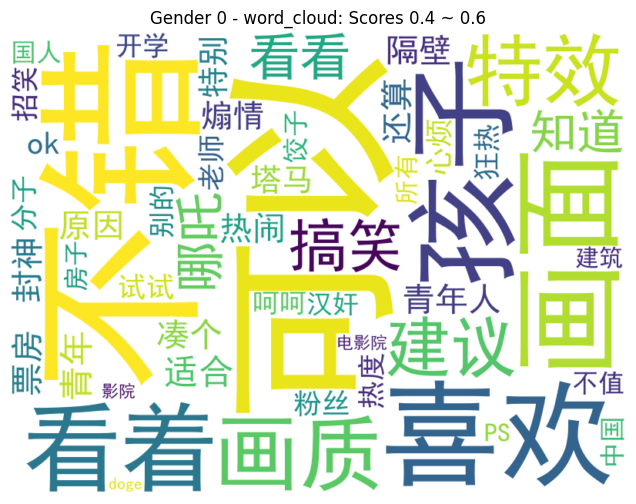

[处理] gender 0，情绪区间：0.6 ~ 0.8，评论数：96


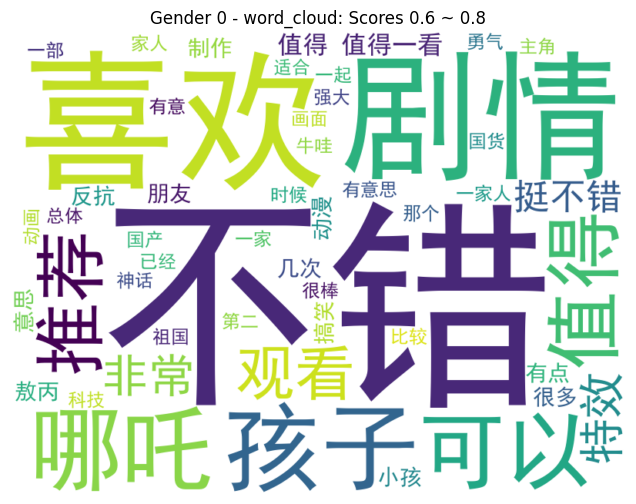

[处理] gender 0，情绪区间：0.8 ~ 1.0，评论数：498


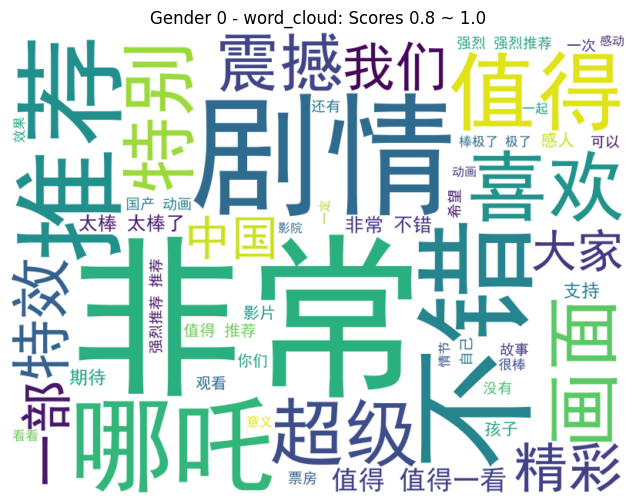

[处理] gender 1，情绪区间：0.0 ~ 0.2，评论数：18


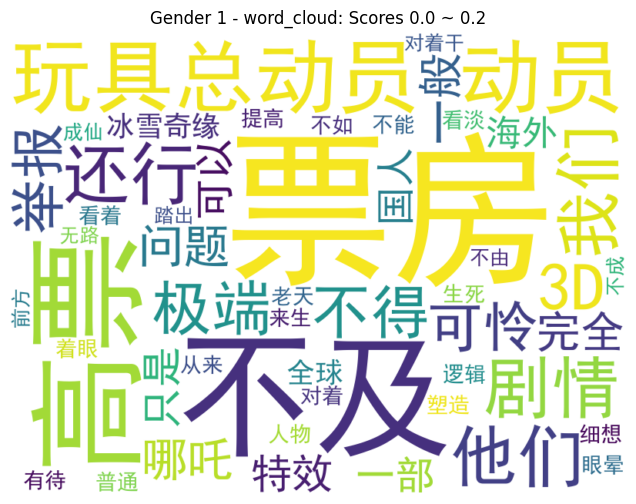

[处理] gender 1，情绪区间：0.2 ~ 0.4，评论数：10


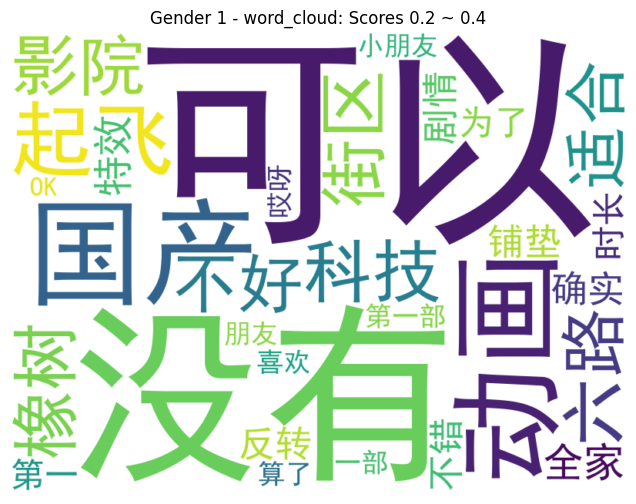

[处理] gender 1，情绪区间：0.4 ~ 0.6，评论数：12


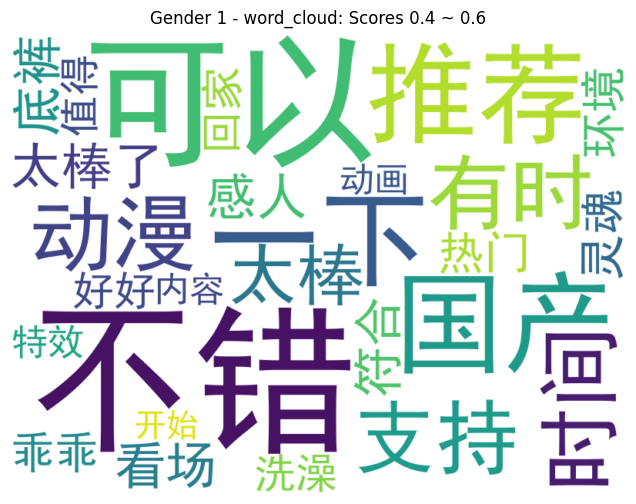

[处理] gender 1，情绪区间：0.6 ~ 0.8，评论数：22


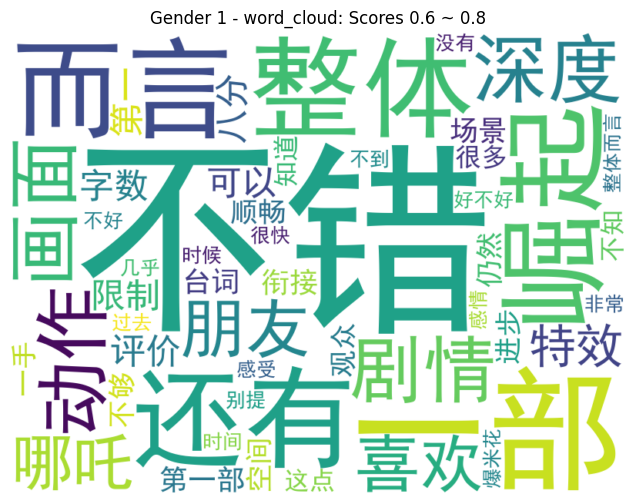

[处理] gender 1，情绪区间：0.8 ~ 1.0，评论数：91


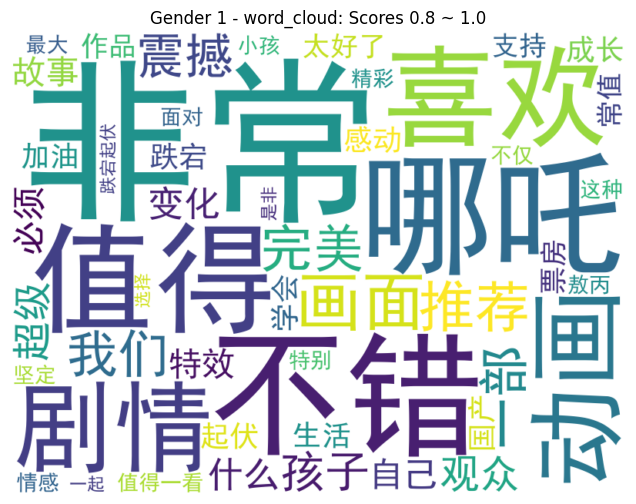

[处理] gender 2，情绪区间：0.0 ~ 0.2，评论数：7


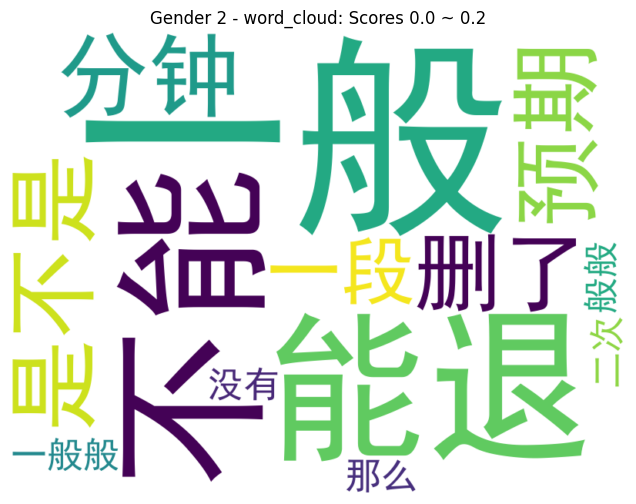

[处理] gender 2，情绪区间：0.2 ~ 0.4，评论数：3


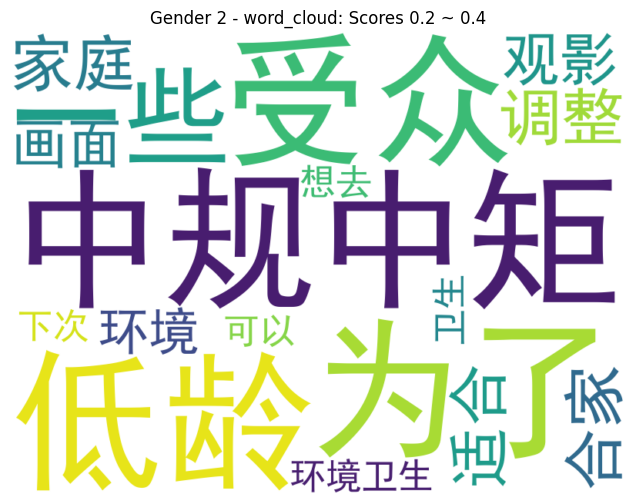

[处理] gender 2，情绪区间：0.4 ~ 0.6，评论数：3


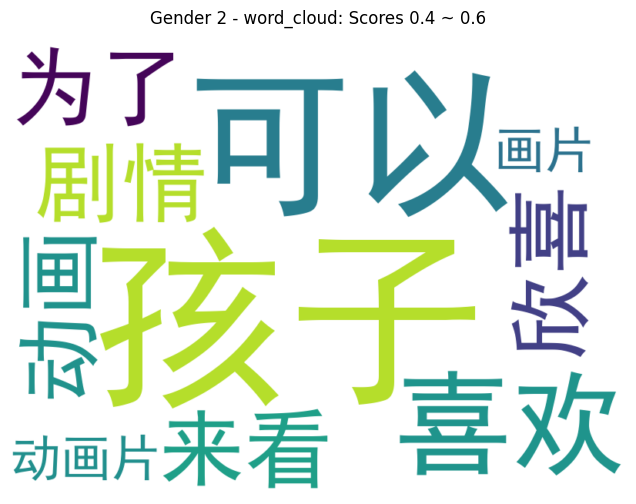

[处理] gender 2，情绪区间：0.6 ~ 0.8，评论数：20


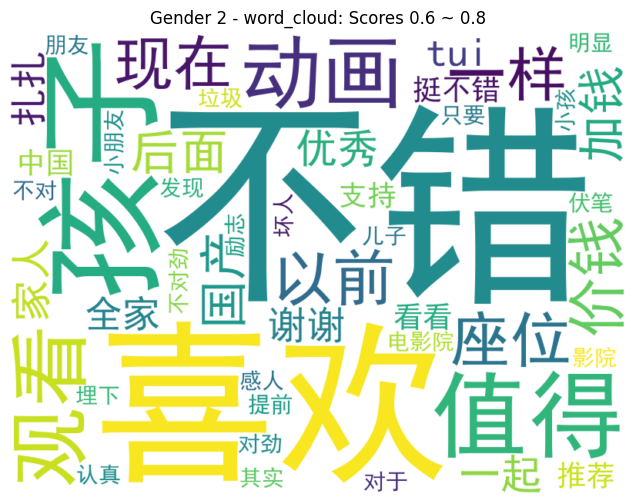

[处理] gender 2，情绪区间：0.8 ~ 1.0，评论数：116


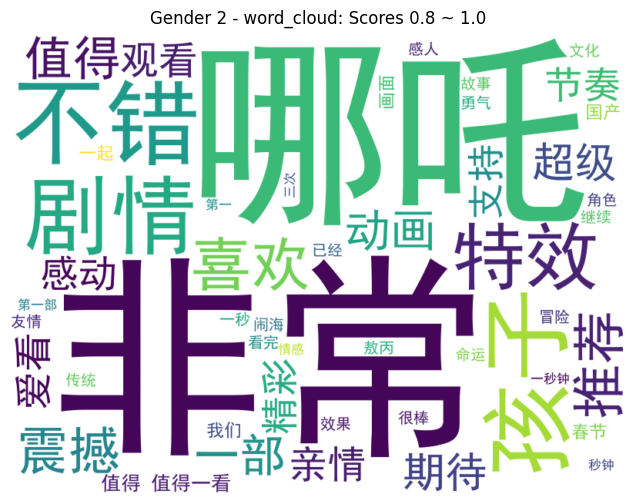

In [ ]:
import jieba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 读取数据
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_neo_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 添加用户自定义词汇（必须放在分词前）
custom_words=[]
algenda_words = ["不好看", "玩具总动员", "冰雪奇缘", "女性", "男性", "中立", "正面", "负面"]
custom_words.extend(algenda_words)
characters = ["申公豹", "哪吒", "敖丙", "太乙真人", "龙王", "东海龙王", "西海龙王", "南海龙王", "北海龙王","陈塘关"]
custom_words.extend(characters)
for word in custom_words:
    jieba.add_word(word)

# 构建停用词表（你可以继续扩展）
stopwords = STOPWORDS.copy()
stopwords.update({
    "电影", "最后", "就是", "不过", "这个", "一个", "感觉", "这部", 
    "虽然", "不是", "真的", "觉得", "还是", "但是", "好看","总动员","玩具","奇缘","冰雪"
})

# 定义分词与清洗函数
def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=True)
    return " ".join([word for word in words if word not in stopwords and len(word.strip()) > 1])

# 循环处理每个情绪区间（0.0 ~ 1.0），并按 gender 划分
for gender in [0, 1, 2]:
    for i in np.arange(0, 1.0, 0.2):
        low, high = round(i, 2), round(i + 0.2, 2)
        
        # 过滤符合条件的评论
        selected_comments = df[(df['sentiment'] >= low) & (df['sentiment'] < high) & (df['gender'] == gender)]['content'].dropna().astype(str)

        if selected_comments.empty:
            print(f"[跳过] gender {gender}，情绪区间 {low} ~ {high} 内无评论")
            continue

        print(f"[处理] gender {gender}，情绪区间：{low} ~ {high}，评论数：{len(selected_comments)}")

        # 合并所有分词结果
        words = " ".join(selected_comments.apply(lambda x: segment_words(x, stopwords)))

        # 生成词云
        wc = WordCloud(
            width=800,
            height=600,
            background_color="white",
            font_path='C:/Windows/Fonts/simhei.ttf',  # 中文支持
            max_words=50
        ).generate(words)

        # 展示词云
        plt.figure(figsize=(10, 6))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Gender {gender} - Sentiment {low} ~ {high}")
        plt.show()



[处理] gender 0，情绪区间：0.0 ~ 0.2，评论数：59
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender0Sentiment0.0_0.2.png


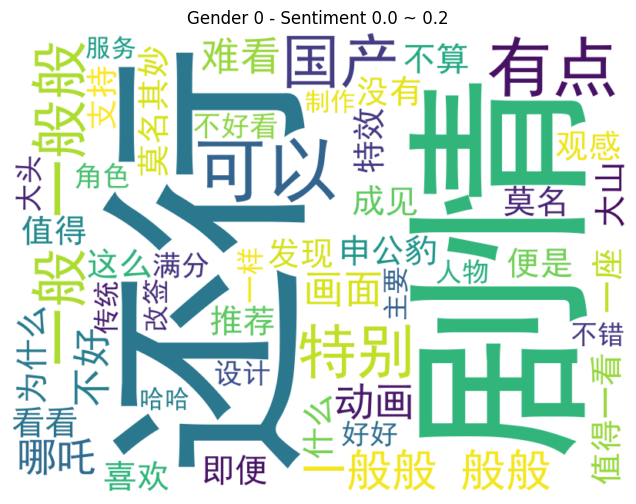

[处理] gender 0，情绪区间：0.2 ~ 0.4，评论数：33
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender0Sentiment0.2_0.4.png


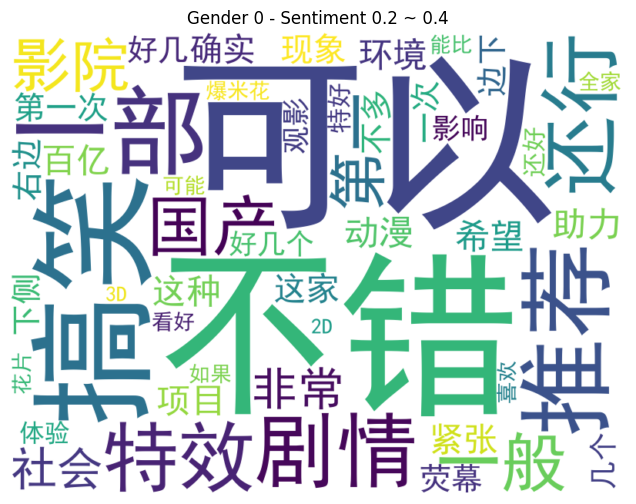

[处理] gender 0，情绪区间：0.4 ~ 0.6，评论数：37
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender0Sentiment0.4_0.6.png


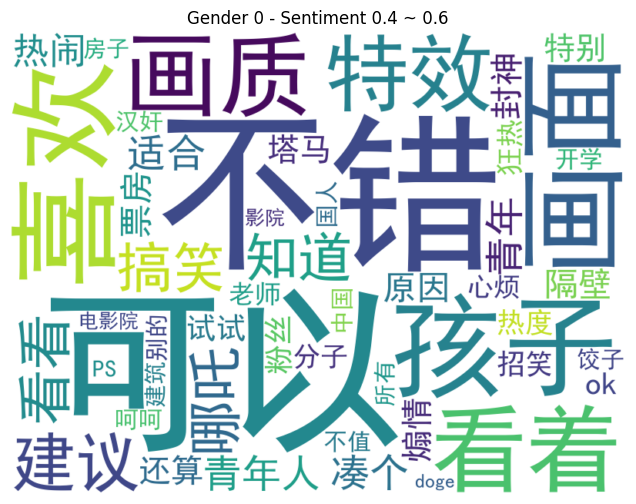

[处理] gender 0，情绪区间：0.6 ~ 0.8，评论数：96
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender0Sentiment0.6_0.8.png


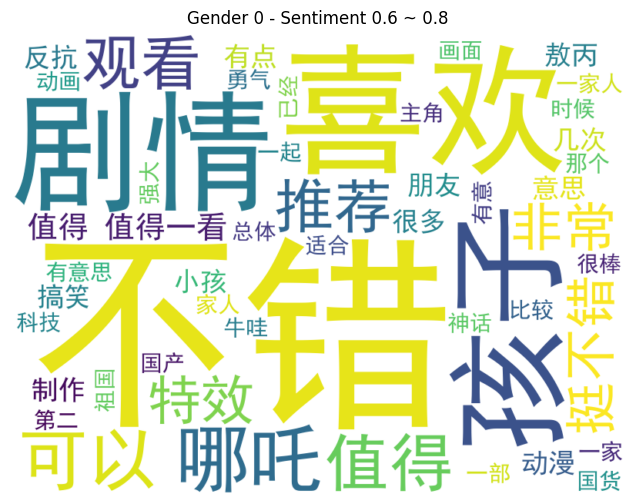

[处理] gender 0，情绪区间：0.8 ~ 1.0，评论数：498
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender0Sentiment0.8_1.0.png


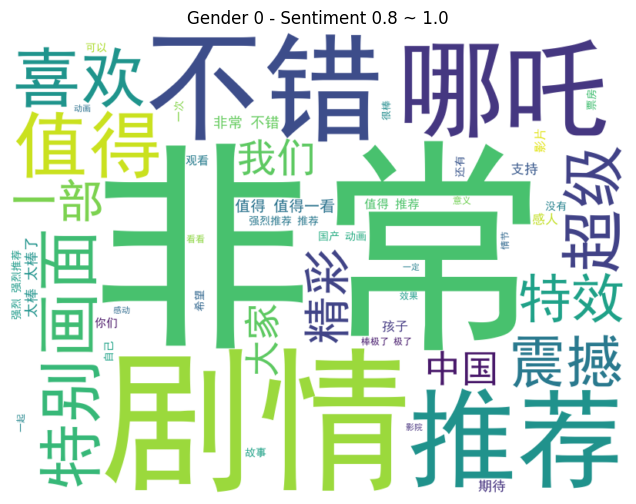

[处理] gender 1，情绪区间：0.0 ~ 0.2，评论数：18
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender1Sentiment0.0_0.2.png


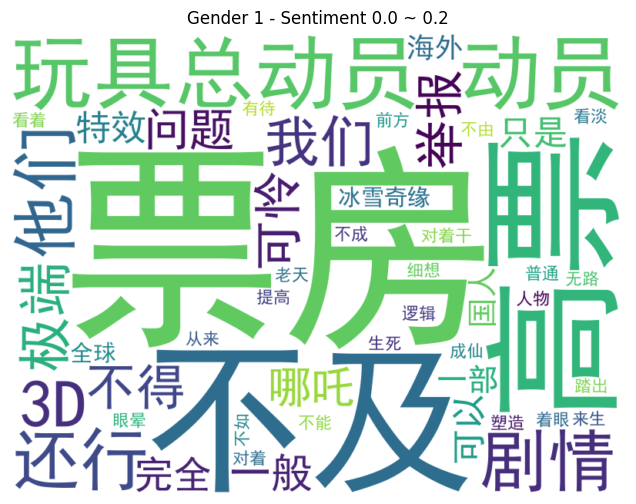

[处理] gender 1，情绪区间：0.2 ~ 0.4，评论数：10
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender1Sentiment0.2_0.4.png


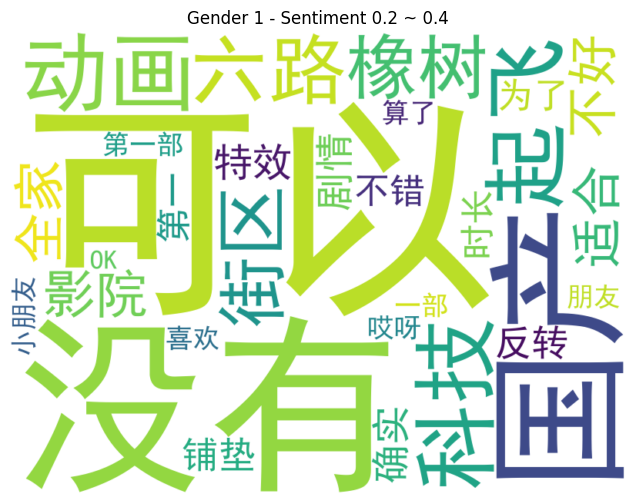

[处理] gender 1，情绪区间：0.4 ~ 0.6，评论数：12
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender1Sentiment0.4_0.6.png


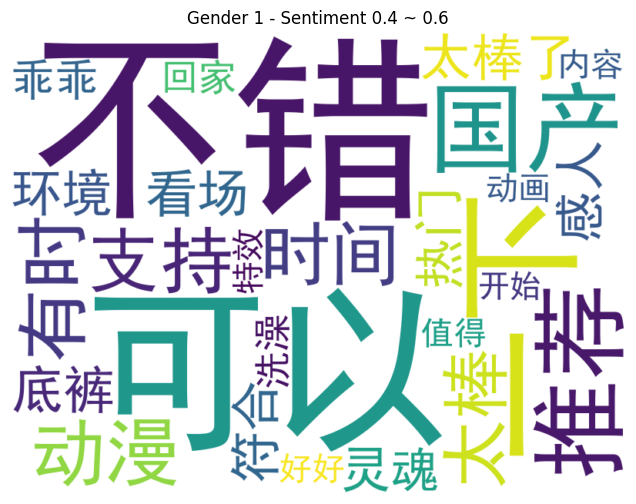

[处理] gender 1，情绪区间：0.6 ~ 0.8，评论数：22
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender1Sentiment0.6_0.8.png


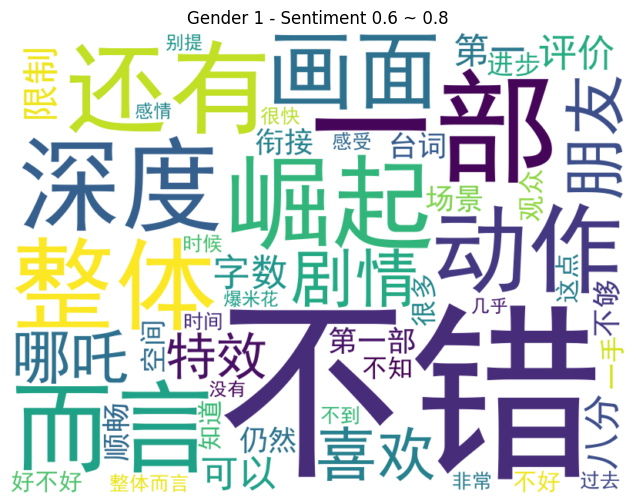

[处理] gender 1，情绪区间：0.8 ~ 1.0，评论数：91
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender1Sentiment0.8_1.0.png


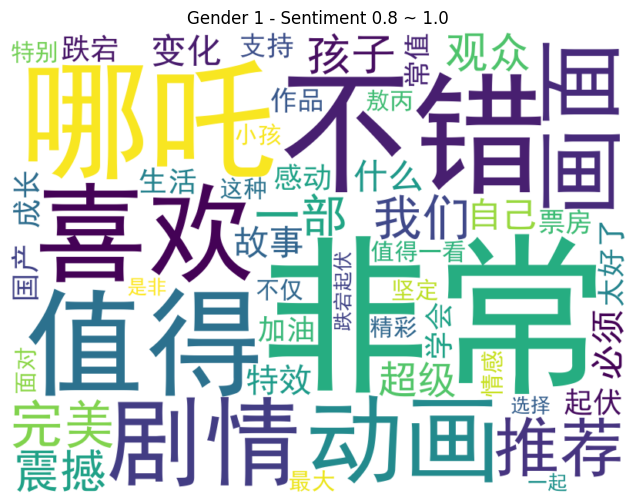

[处理] gender 2，情绪区间：0.0 ~ 0.2，评论数：7
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender2Sentiment0.0_0.2.png


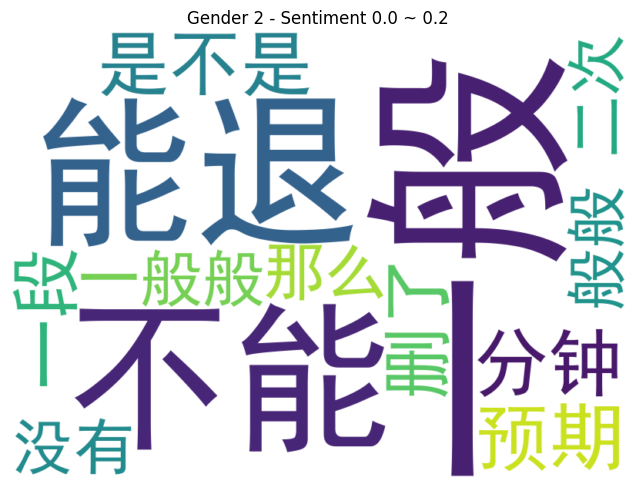

[处理] gender 2，情绪区间：0.2 ~ 0.4，评论数：3
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender2Sentiment0.2_0.4.png


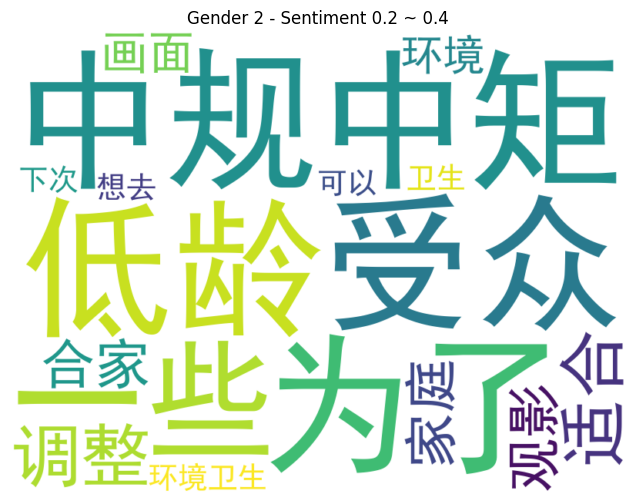

[处理] gender 2，情绪区间：0.4 ~ 0.6，评论数：3
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender2Sentiment0.4_0.6.png


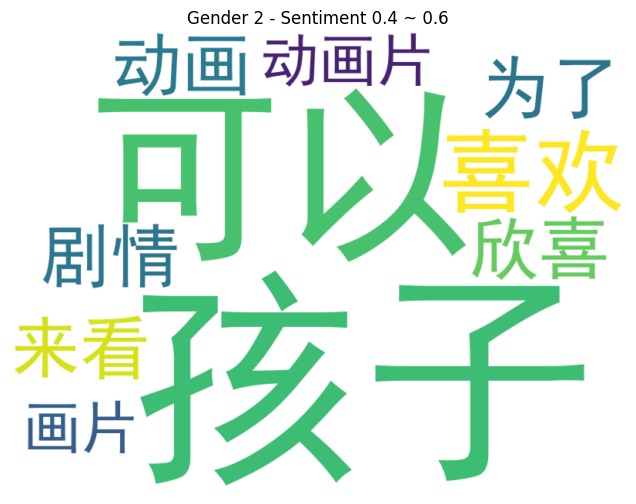

[处理] gender 2，情绪区间：0.6 ~ 0.8，评论数：20
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender2Sentiment0.6_0.8.png


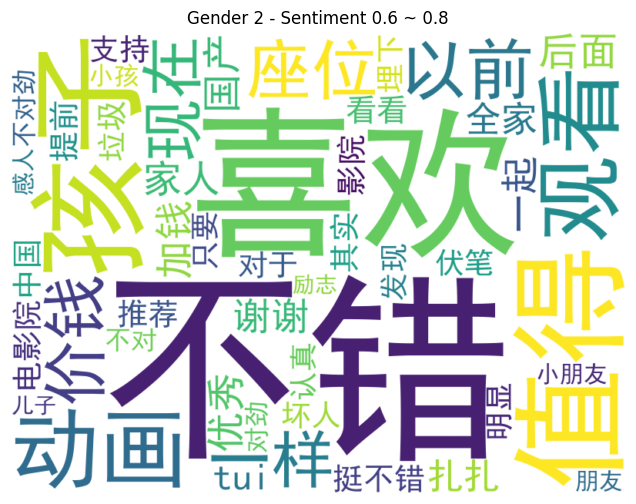

[处理] gender 2，情绪区间：0.8 ~ 1.0，评论数：116
✅ 词云已保存到：D:/information_information_visualization_HW/final_project/public/data/Gender2Sentiment0.8_1.0.png


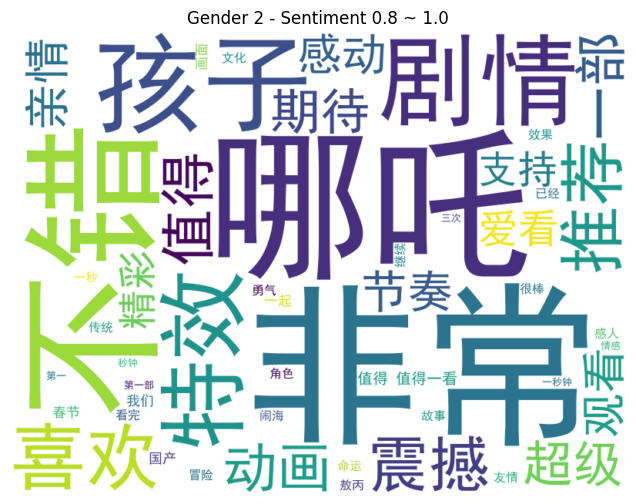

In [ ]:
import jieba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 读取数据
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_neo_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 添加用户自定义词汇（必须放在分词前）
custom_words=[]
algenda_words = ["不好看", "玩具总动员", "冰雪奇缘", "女性", "男性", "中立", "正面", "负面"]
custom_words.extend(algenda_words)
characters = ["申公豹", "哪吒", "敖丙", "太乙真人", "龙王", "东海龙王", "西海龙王", "南海龙王", "北海龙王","陈塘关"]
custom_words.extend(characters)
for word in custom_words:
    jieba.add_word(word)

# 构建停用词表（你可以继续扩展）
stopwords = STOPWORDS.copy()
stopwords.update({
    "电影", "最后", "就是", "不过", "这个", "一个", "感觉", "这部", 
    "虽然", "不是", "真的", "觉得", "还是", "但是", "好看","总动员","玩具","奇缘","冰雪"
})

# 定义分词与清洗函数
def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=True)
    return " ".join([word for word in words if word not in stopwords and len(word.strip()) > 1])

# 循环处理每个情绪区间（0.0 ~ 1.0），并按 gender 划分
for gender in [0, 1, 2]:
    j = 0
    for i in np.arange(0, 1.0, 0.2):
        low, high = round(i, 2), round(i + 0.2, 2)
        
        # 过滤符合条件的评论
        selected_comments = df[(df['sentiment'] >= low) & (df['sentiment'] < high) & (df['gender'] == gender)]['content'].dropna().astype(str)

        if selected_comments.empty:
            print(f"[跳过] gender {gender}，情绪区间 {low} ~ {high} 内无评论")
            continue

        print(f"[处理] gender {gender}，情绪区间：{low} ~ {high}，评论数：{len(selected_comments)}")

        # 合并所有分词结果
        words = " ".join(selected_comments.apply(lambda x: segment_words(x, stopwords)))

        # 生成词云
        wc = WordCloud(
            width=800,
            height=600,
            background_color="white",
            font_path='C:/Windows/Fonts/simhei.ttf',  # 中文支持
            max_words=50
        ).generate(words)

        # 定义保存路径
        output_path = f"D:/information_information_visualization_HW/final_project/public/data/Gender{gender}Sentiment{j}.png"

        # 保存词云到指定路径
        wc.to_file(output_path)

        print(f"✅ 词云已保存到：{output_path}")
        j+=1


In [1]:
import jieba
import pandas as pd
import numpy as np
import json
from wordcloud import WordCloud, STOPWORDS

# 读取数据
df = pd.read_csv('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\Nezha2_neo_building_clouds.csv', encoding='utf-8-sig', low_memory=False)

# 添加用户自定义词汇（必须放在分词前）
custom_words=[]
algenda_words = ["不好看", "玩具总动员", "冰雪奇缘", "女性", "男性", "中立", "正面", "负面"]
custom_words.extend(algenda_words)
characters = ["申公豹", "哪吒", "敖丙", "太乙真人", "龙王", "东海龙王", "西海龙王", "南海龙王", "北海龙王","陈塘关"]
custom_words.extend(characters)
for word in custom_words:
    jieba.add_word(word)

# 构建停用词表（你可以继续扩展）
stopwords = STOPWORDS.copy()
stopwords.update({
    "电影", "最后", "就是", "不过", "这个", "一个", "感觉", "这部", 
    "虽然", "不是", "真的", "觉得", "还是", "但是", "好看","总动员","玩具","奇缘","冰雪"
})

# 定义分词与清洗函数
def segment_words(text, stopwords):
    words = jieba.cut(text, cut_all=True)
    return [word for word in words if word not in stopwords and len(word.strip()) > 1]

# 筛选出符合条件的评论
low, high = 0.2, 0.4
selected_comments = df[(df['sentiment'] >= low) & (df['sentiment'] < high) & (df['gender'] == 1)]['content'].dropna().astype(str)

# 合并所有分词结果
all_words = []
for comment in selected_comments:
    all_words.extend(segment_words(comment, stopwords))

# 计算词频
word_freq = {}
for word in all_words:
    word_freq[word] = word_freq.get(word, 0) + 1

# 生成词云数据，格式为JSON
wordcloud_data = [{"text": word, "value": freq} for word, freq in word_freq.items()]

# 保存为JSON文件
with open('C:\\Users\\顾子琪\\Desktop\\上纽大文件\\2025 SPRING\\wordcloud_data.json', 'w', encoding='utf-8') as f:
    json.dump(wordcloud_data, f, ensure_ascii=False, indent=4)

print("词云数据已保存为 wordcloud_data.json")


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\顾子琪\AppData\Local\Temp\jieba.cache
Loading model cost 0.657 seconds.
Prefix dict has been built successfully.


词云数据已保存为 wordcloud_data.json
